In [1]:
import os
import pandas as pd

# Directories
read_dir = "dataset_human_pancreas/"

# Filenames
expr_filename = 'myData_pancreatic_5batches.txt'
metadata_filename = 'mySample_pancreatic_5batches.txt'

batch_label = "batchlb"
celltype_label = "CellType"

# Constructing file paths
expr_filepath = os.path.join(read_dir, expr_filename)
metadata_filepath = os.path.join(read_dir, metadata_filename)

# Read expression matrix and metadata into dfs
expr_mat = pd.read_csv(expr_filepath, sep='\t', header=0, index_col=0)
metadata = pd.read_csv(metadata_filepath, sep='\t', header=0, index_col=0)

# Rename the 'ct' column in metadata to 'CellType'
metadata.rename(columns={'ct': 'CellType'}, inplace=True)

# Filter the expression matrix to include only columns present in the metadata
expr_mat = expr_mat.loc[:, metadata.index]

# Check the resulting expression matrix and metadata
display(expr_mat.head())
display(metadata.head())


,human1_lib1.final_cell_0001,human1_lib1.final_cell_0002,human1_lib1.final_cell_0003,human1_lib1.final_cell_0004,human1_lib1.final_cell_0005,human1_lib1.final_cell_0006,human1_lib1.final_cell_0007,human1_lib1.final_cell_0008,human1_lib1.final_cell_0009,human1_lib1.final_cell_0010,...,Sample_1589,Sample_1590,Sample_1591,Sample_1592,Sample_1593,Sample_1594,Sample_1595,Sample_1597,Sample_1598,Sample_1600
A1BG,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.3304,2.4857,0.0000,8.1498,0.5372,31.1225,0.5788
A1CF,4,0,0,0,0,1,0,1,0,0,...,6.8671,11.9884,26.3156,0.0000,5.0270,151.0094,0.8452,12.7441,0.9078,0.6753
A2M,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
A4GALT,0,0,0,0,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


,batch,batchlb,celltype_orig,cellname,celltype
human1_lib1.final_cell_0001,1,Baron_b1,acinar,human1_lib1.final_cell_0001,acinar
human1_lib1.final_cell_0002,1,Baron_b1,acinar,human1_lib1.final_cell_0002,acinar
human1_lib1.final_cell_0003,1,Baron_b1,acinar,human1_lib1.final_cell_0003,acinar
human1_lib1.final_cell_0004,1,Baron_b1,acinar,human1_lib1.final_cell_0004,acinar
human1_lib1.final_cell_0005,1,Baron_b1,acinar,human1_lib1.final_cell_0005,acinar


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc

metadata = metadata.loc[expr_mat.columns]

# Distribution of Number of Genes per Cell
plt.figure(figsize=(8, 6))
sns.histplot(metadata['nGene'], kde=False, bins=50)
plt.title('Distribution of Number of Genes per Cell')
plt.xlabel('Number of Genes')
plt.ylabel('Frequency')

KeyError: 'nGene'

<Figure size 800x600 with 0 Axes>

In [3]:
# Distribution of UMIs (nUMI) per Cell
plt.figure(figsize=(8, 6))
sns.histplot(metadata['nUMI'], kde=False, bins=50)
plt.title('Distribution of UMIs per Cell')
plt.xlabel('Number of UMIs')
plt.ylabel('Frequency')
plt.show()

KeyError: 'nUMI'

<Figure size 800x600 with 0 Axes>

In [4]:
# Compare nGene Distribution Across Batches
plt.figure(figsize=(10, 6))
sns.boxplot(x='batch', y='nGene', data=metadata)
plt.title('Number of Genes per Cell across Batches')
plt.xlabel('Batch')
plt.ylabel('Number of Genes')

ValueError: Could not interpret value `nGene` for `y`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

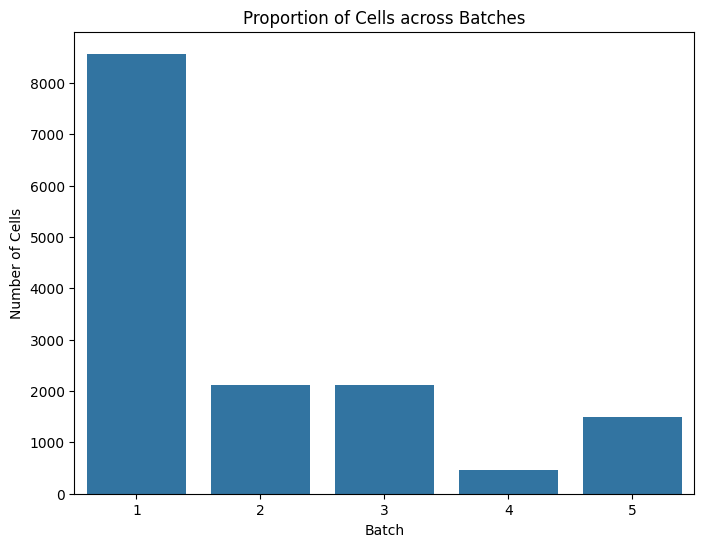

In [5]:
# Proportion of Cells per Batch
plt.figure(figsize=(8, 6))
sns.countplot(x='batch', data=metadata)
plt.title('Proportion of Cells across Batches')
plt.xlabel('Batch')
plt.ylabel('Number of Cells')
plt.show()

4,239, Confirmed
2,715

In [6]:
# Proportion of Cells per Cell Type across Batches
plt.figure(figsize=(12, 6))
sns.countplot(x='CellType', hue='batch', data=metadata)
plt.title('Proportion of Cells per Cell Type across Batches')
plt.xticks(rotation=90)
plt.xlabel('Cell Type')
plt.ylabel('Number of Cells')
plt.show()

ValueError: Could not interpret value `CellType` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

KeyError: 'Could not find key CellType in .var_names or .obs.columns.'

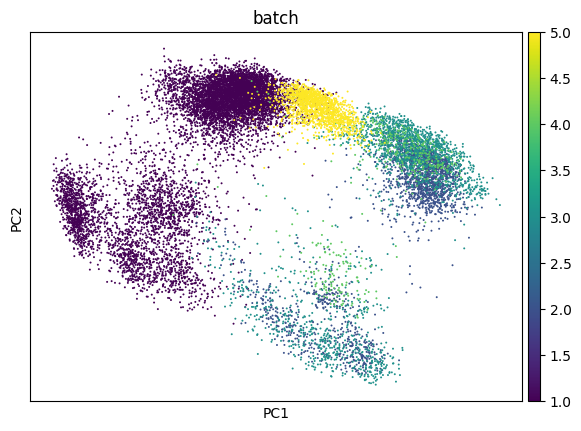

In [7]:
# Prepare data for scanpy AnnData
adata = sc.AnnData(X=expr_mat.T, obs=metadata)

# Normalize & log transform data 
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

# Run PCA & UMAP for batch visualization
sc.tl.pca(adata)
sc.pl.pca(adata, color=['batch', 'CellType'])

# Running UMAP
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.pl.umap(adata, color=['batch', 'CellType'])